In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import ezc3d
import os
from tqdm import tqdm

from Functions import Joint_Angle

In [9]:
file_list = [i.replace('\\','/') for i in sorted(glob('Data/theia_c3d/*c3d'))]
file_name = [os.path.basename(i).replace('.c3d','') for i in file_list]
AB_list = [i for i in file_list if "AB" in i]
AB_name = [os.path.basename(i).replace('.c3d','') for i in AB_list]
FL_list = [i for i in file_list if "FL" in i]
FL_name = [os.path.basename(i).replace('.c3d','') for i in FL_list]
YB_list = [i for i in file_list if "Y-BAL" in i]
YB_name = [os.path.basename(i).replace('.c3d','') for i in YB_list]
Other_list = [i for i in file_list if ("HAD" in i)|("IRER" in i)]
Other_name = [os.path.basename(i).replace('.c3d','') for i in Other_list]

### Calculate Shoulder Abduction (From Transformation Matrix)

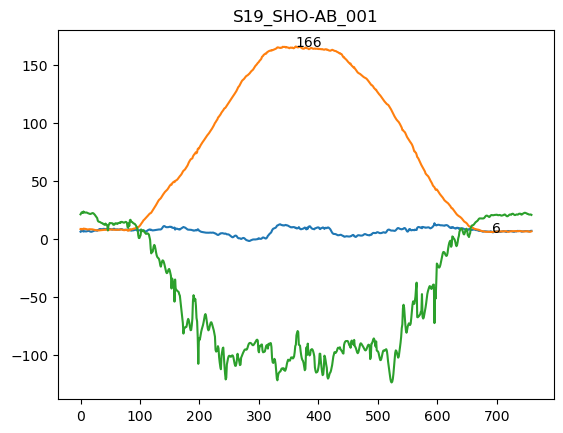

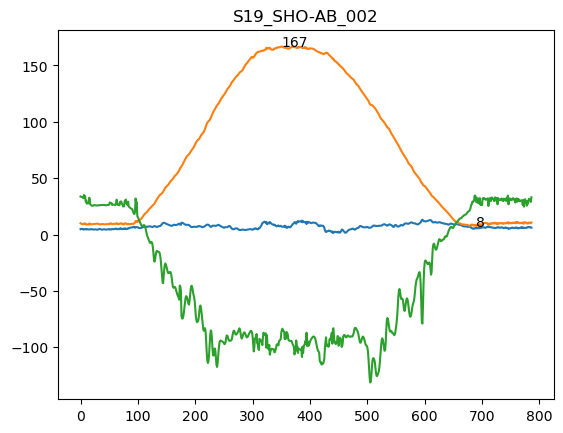

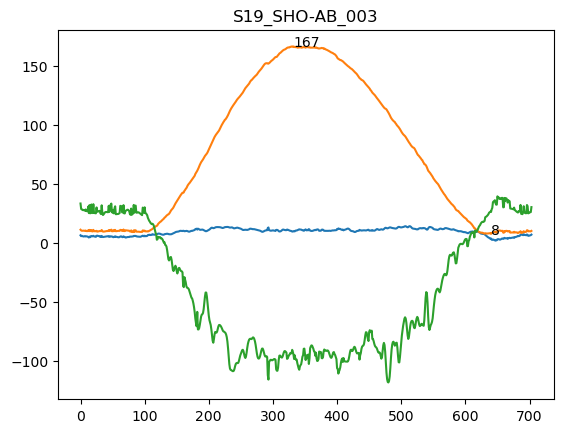

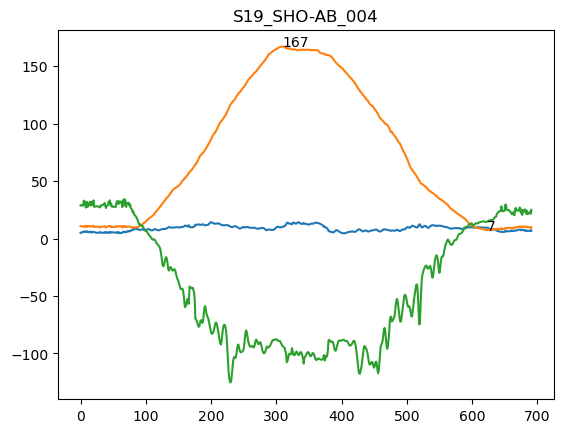

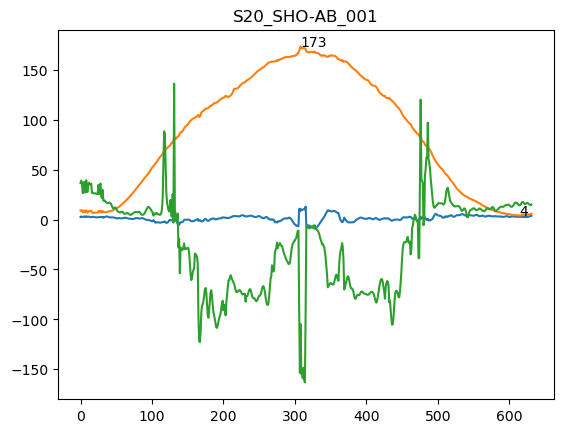

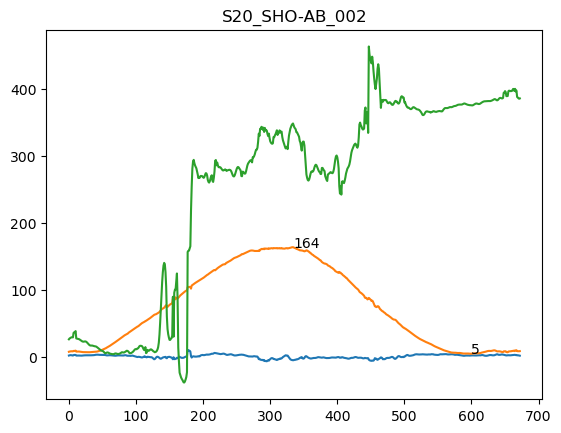

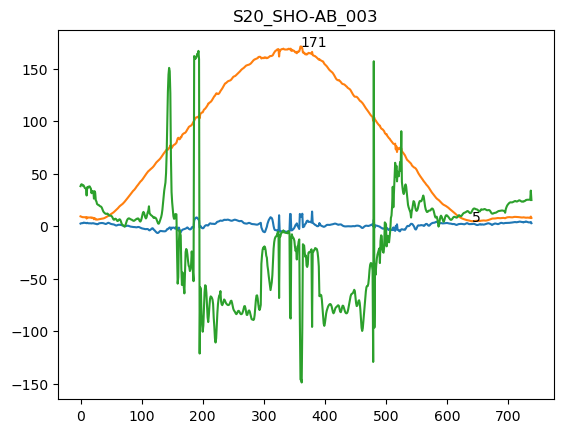

In [ ]:
AB = {}
for file, name in zip(AB_list, AB_name):
    c3d = ezc3d.c3d(file,extract_forceplat_data=True)
    # 4x4 Transformation Matrix
    label = [i.replace('_4X4','') for i in c3d['parameters']['ROTATION']['LABELS']['value']]
    tmat = c3d['data']['rotations']

    RMAT = {}
    TMAT = {}
    origin = {}
    origin_df = pd.DataFrame()

    for i in range(tmat.shape[2]):

        TMAT[label[i]] = tmat[:,:,i,:]
        RMAT[label[i]] = tmat[:3,:3,i,:]
        
        # Scaling 조정
        TMAT[label[i]][:3,3,:] = TMAT[label[i]][:3,3,:] / 1000 # mm 단위 -> m 단위로 변환
        origin[label[i]] = TMAT[label[i]][:3,3,:]
        org = pd.DataFrame(TMAT[label[i]][:3,3,:].T, columns = [label[i] + '_X',label[i] + '_Y',label[i] + '_Z'])
        origin_df = pd.concat([origin_df, org], axis = 1)
        
    shoulder_angle   = Joint_Angle.joint_angle(TMAT['torso'][:,:,:-2], TMAT['r_uarm'][:,:,:-2], 'RT_SHOULDER', 'yxz') # ZYZ
    for col in shoulder_angle.columns:
        shoulder_angle[col] = Joint_Angle.process_angle(shoulder_angle[col])

    # shoulder_angle['RT_SHOULDER_ANGLE_X'] = shoulder_angle['RT_SHOULDER_ANGLE_X'] - shoulder_angle['RT_SHOULDER_ANGLE_X'].iloc[:30].mean()
    # # shoulder_angle['RT_SHOULDER_ANGLE_Y'] = shoulder_angle['RT_SHOULDER_ANGLE_Y'] - shoulder_angle['RT_SHOULDER_ANGLE_Y'].iloc[:30].mean()
    # shoulder_angle['RT_SHOULDER_ANGLE_Z'] = shoulder_angle['RT_SHOULDER_ANGLE_Z'] - shoulder_angle['RT_SHOULDER_ANGLE_Z'].iloc[:30].mean()
    shoulder_angle['RT_SHOULDER_ANGLE_Y'] = - shoulder_angle['RT_SHOULDER_ANGLE_Y']

    AB[name] = shoulder_angle
    plt.plot(shoulder_angle)
    plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_Y'] == shoulder_angle['RT_SHOULDER_ANGLE_Y'].max())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_Y'].max(), round(shoulder_angle['RT_SHOULDER_ANGLE_Y'].max()))
    plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_Y'] == shoulder_angle['RT_SHOULDER_ANGLE_Y'].min())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_Y'].min(), round(shoulder_angle['RT_SHOULDER_ANGLE_Y'].min()))
    plt.title(name)
    plt.show()

### Calculate Shoulder Flexion (From Transformation Matrix)

0it [00:00, ?it/s]

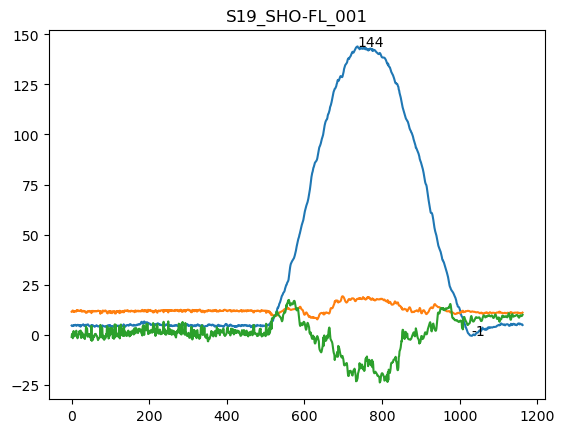

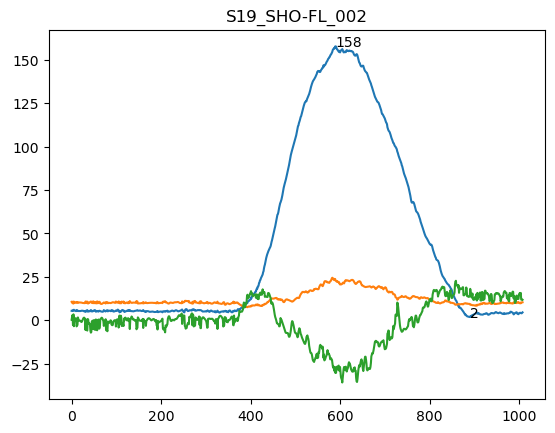

2it [00:00, 11.52it/s]

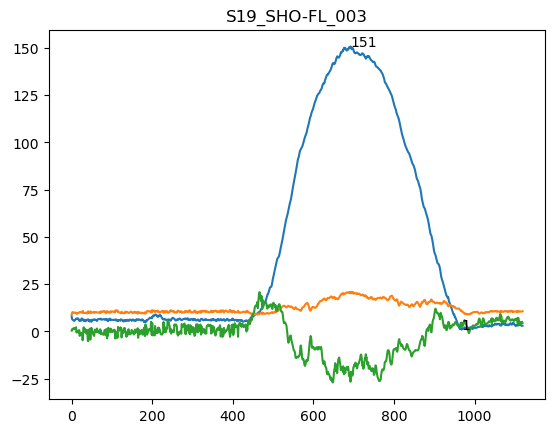

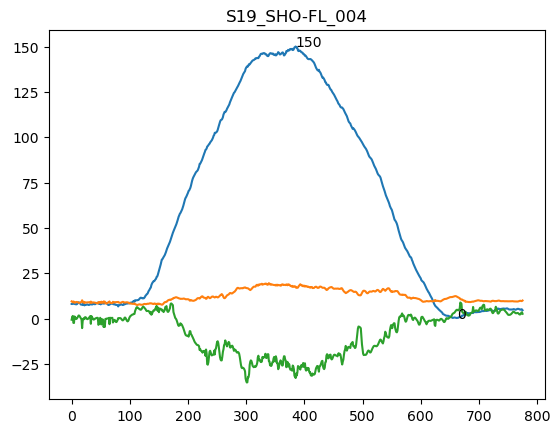

4it [00:00, 12.19it/s]

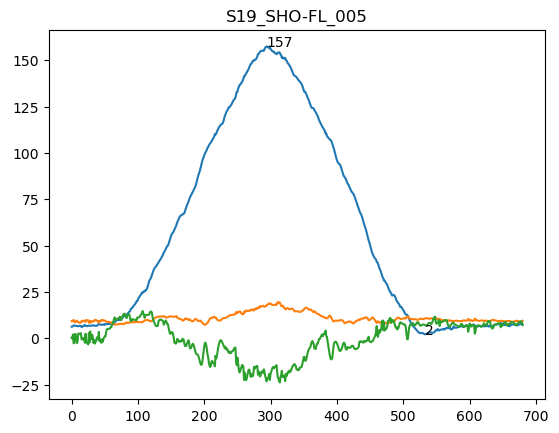

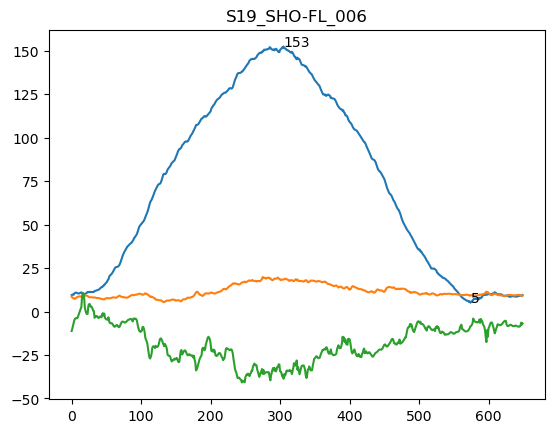

6it [00:00, 12.98it/s]

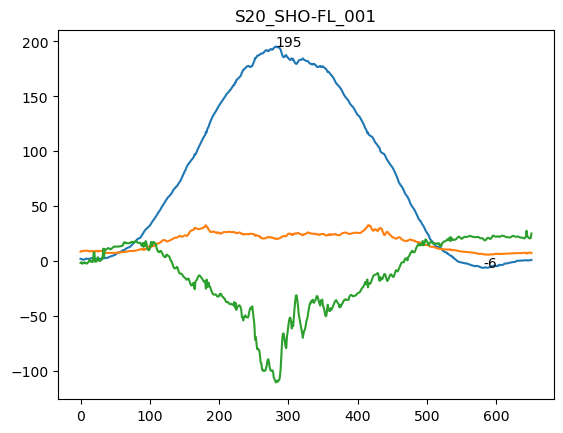

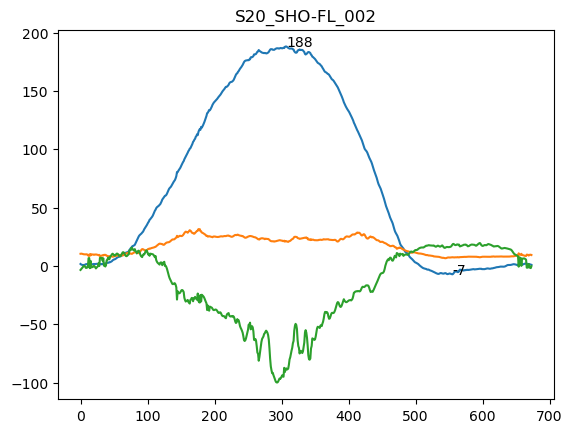

8it [00:00, 13.43it/s]

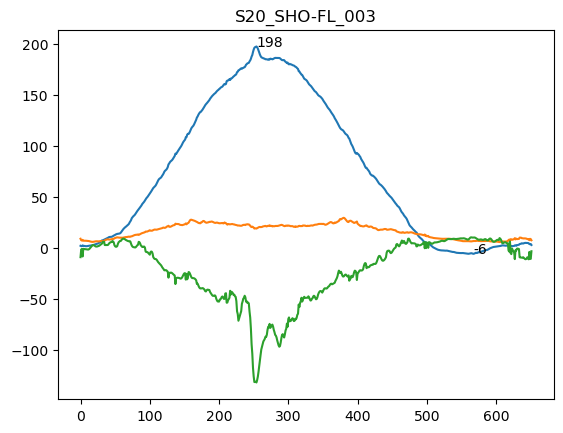

9it [00:00, 13.21it/s]


In [13]:
FL = {}
for file, name in tqdm(zip(FL_list, FL_name)):    
    c3d = ezc3d.c3d(file,extract_forceplat_data=True)
    label = [i.replace('_4X4','') for i in c3d['parameters']['ROTATION']['LABELS']['value']]
    tmat = c3d['data']['rotations']

    RMAT = {}
    TMAT = {}
    origin = {}
    origin_df = pd.DataFrame()

    for i in range(tmat.shape[2]):

        TMAT[label[i]] = tmat[:,:,i,:]
        RMAT[label[i]] = tmat[:3,:3,i,:]
        
        # Scaling 조정
        TMAT[label[i]][:3,3,:] = TMAT[label[i]][:3,3,:] / 1000 # mm 단위 -> m 단위로 변환
        origin[label[i]] = TMAT[label[i]][:3,3,:]
        org = pd.DataFrame(TMAT[label[i]][:3,3,:].T, columns = [label[i] + '_X',label[i] + '_Y',label[i] + '_Z'])
        origin_df = pd.concat([origin_df, org], axis = 1)
        
    shoulder_angle   = Joint_Angle.joint_angle(TMAT['torso'][:,:,:-2], TMAT['r_uarm'][:,:,:-2], 'RT_SHOULDER', 'xyz') # ZYZ
    for col in shoulder_angle.columns:
        shoulder_angle[col] = Joint_Angle.process_angle(shoulder_angle[col])


    # shoulder_angle['RT_SHOULDER_ANGLE_X'] = shoulder_angle['RT_SHOULDER_ANGLE_X'] - shoulder_angle['RT_SHOULDER_ANGLE_X'].iloc[:30].mean()
    # shoulder_angle['RT_SHOULDER_ANGLE_Y'] = shoulder_angle['RT_SHOULDER_ANGLE_Y'] - shoulder_angle['RT_SHOULDER_ANGLE_Y'].iloc[:30].mean()
    shoulder_angle['RT_SHOULDER_ANGLE_Z'] = - (shoulder_angle['RT_SHOULDER_ANGLE_Z'] - shoulder_angle['RT_SHOULDER_ANGLE_Z'].iloc[:30].mean())
    shoulder_angle['RT_SHOULDER_ANGLE_Y'] = - shoulder_angle['RT_SHOULDER_ANGLE_Y']

    FL[name] = shoulder_angle
    plt.plot(shoulder_angle)
    plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_X'] == shoulder_angle['RT_SHOULDER_ANGLE_X'].max())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_X'].max(), round(shoulder_angle['RT_SHOULDER_ANGLE_X'].max()))
    plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_X'] == shoulder_angle['RT_SHOULDER_ANGLE_X'].min())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_X'].min(), round(shoulder_angle['RT_SHOULDER_ANGLE_X'].min()))
    plt.title(name)
    plt.show()

### Calculate Other Angles (From Transformation Matrix)

0it [00:00, ?it/s]

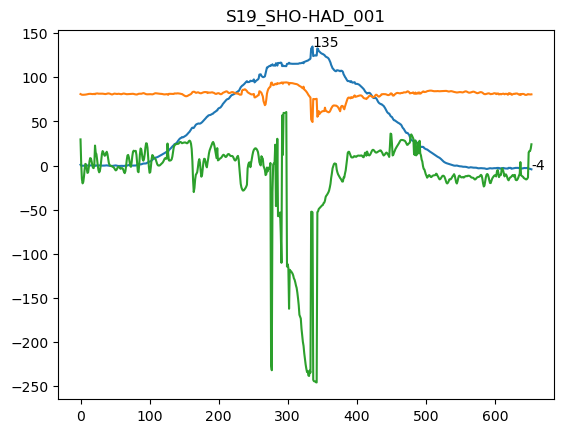

1it [00:00,  7.85it/s]

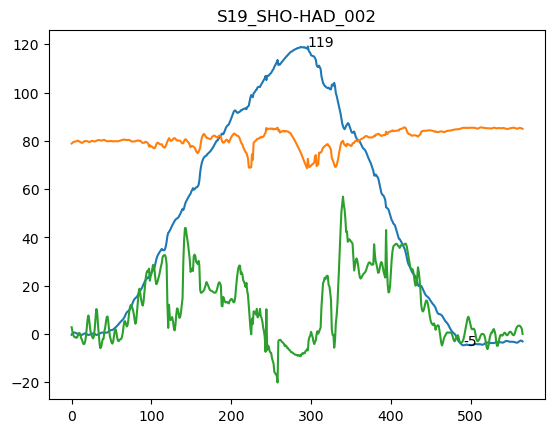

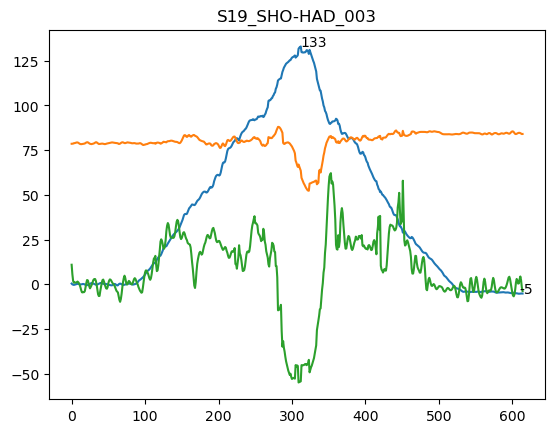

3it [00:00, 11.40it/s]

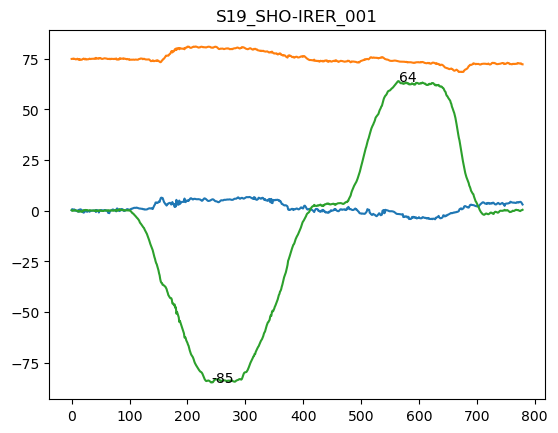

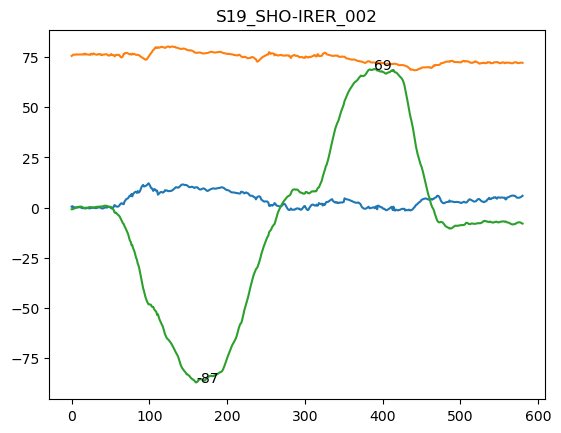

5it [00:00, 12.62it/s]

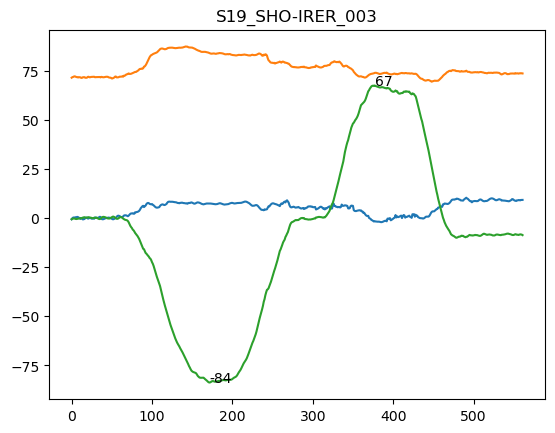

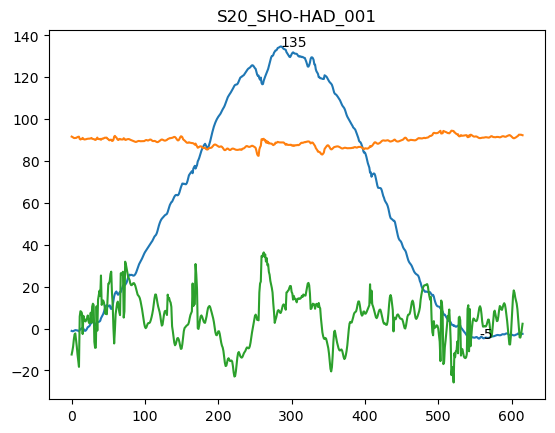

7it [00:00, 13.22it/s]

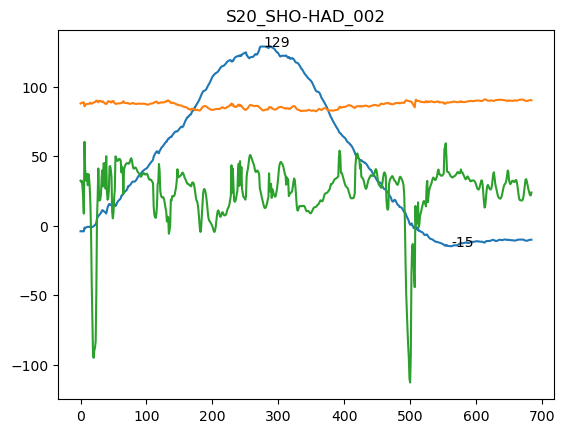

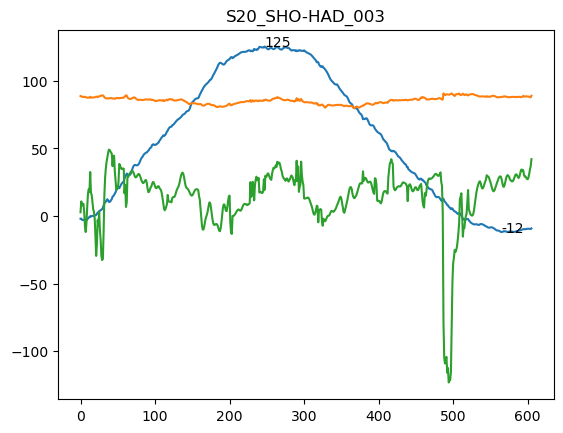

9it [00:00, 13.69it/s]

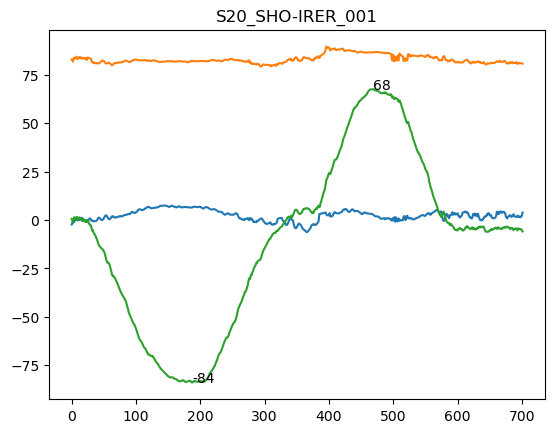

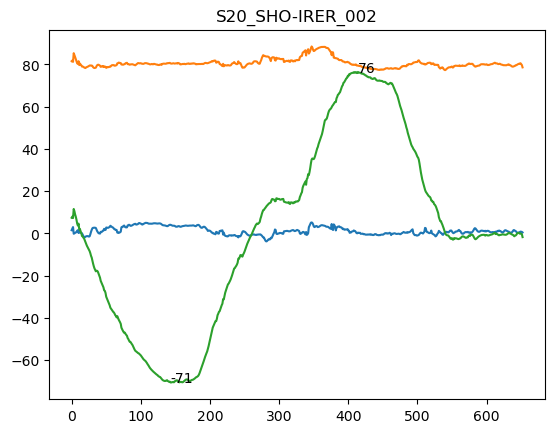

11it [00:00, 12.78it/s]

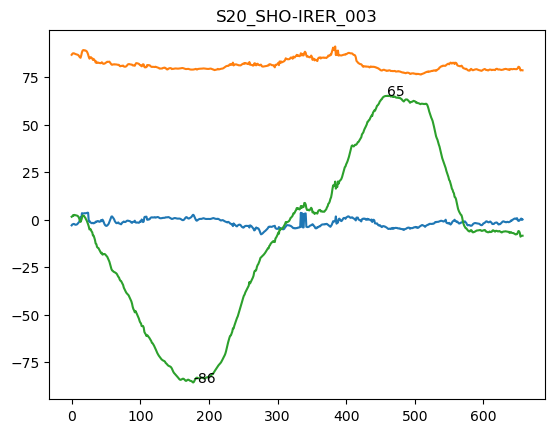

12it [00:00, 12.68it/s]


In [14]:
other = {}
for file, name in tqdm(zip(Other_list, Other_name)):    
    c3d = ezc3d.c3d(file,extract_forceplat_data=True)
    label = [i.replace('_4X4','') for i in c3d['parameters']['ROTATION']['LABELS']['value']]
    tmat = c3d['data']['rotations']

    RMAT = {}
    TMAT = {}
    origin = {}
    origin_df = pd.DataFrame()

    for i in range(tmat.shape[2]):

        TMAT[label[i]] = tmat[:,:,i,:]
        RMAT[label[i]] = tmat[:3,:3,i,:]
        
        # Scaling 조정
        TMAT[label[i]][:3,3,:] = TMAT[label[i]][:3,3,:] / 1000 # mm 단위 -> m 단위로 변환
        origin[label[i]] = TMAT[label[i]][:3,3,:]
        org = pd.DataFrame(TMAT[label[i]][:3,3,:].T, columns = [label[i] + '_X',label[i] + '_Y',label[i] + '_Z'])
        origin_df = pd.concat([origin_df, org], axis = 1)
        
    shoulder_angle   = Joint_Angle.joint_angle(TMAT['torso'][:,:,:-2], TMAT['r_uarm'][:,:,:-2], 'RT_SHOULDER', 'zyz') # ZYZ
    for col in shoulder_angle.columns:
        shoulder_angle[col] = Joint_Angle.process_angle(shoulder_angle[col])

    shoulder_angle['RT_SHOULDER_ANGLE_X'] = shoulder_angle['RT_SHOULDER_ANGLE_X'] - shoulder_angle['RT_SHOULDER_ANGLE_X'].iloc[:30].mean()
    # shoulder_angle['RT_SHOULDER_ANGLE_Y'] = shoulder_angle['RT_SHOULDER_ANGLE_Y'] - shoulder_angle['RT_SHOULDER_ANGLE_Y'].iloc[:30].mean()
    shoulder_angle['RT_SHOULDER_ANGLE_Z'] = shoulder_angle['RT_SHOULDER_ANGLE_Z'] - shoulder_angle['RT_SHOULDER_ANGLE_Z'].iloc[:30].mean()

    other[name] = shoulder_angle
    plt.plot(shoulder_angle)
    if 'HAD' in file:
        plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_X'] == shoulder_angle['RT_SHOULDER_ANGLE_X'].max())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_X'].max(), round(shoulder_angle['RT_SHOULDER_ANGLE_X'].max()))
        plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_X'] == shoulder_angle['RT_SHOULDER_ANGLE_X'].min())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_X'].min(), round(shoulder_angle['RT_SHOULDER_ANGLE_X'].min()))
    if 'IRER' in file:
        plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_Z'] == shoulder_angle['RT_SHOULDER_ANGLE_Z'].max())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_Z'].max(), round(shoulder_angle['RT_SHOULDER_ANGLE_Z'].max()))
        plt.text(np.where(shoulder_angle['RT_SHOULDER_ANGLE_Z'] == shoulder_angle['RT_SHOULDER_ANGLE_Z'].min())[0][0], shoulder_angle['RT_SHOULDER_ANGLE_Z'].min(), round(shoulder_angle['RT_SHOULDER_ANGLE_Z'].min()))
    plt.title(name)
    plt.show()

In [15]:
storeDir = 'ExpData/THEIA_FINAL'
os.makedirs(storeDir, exist_ok=True)
for ab in AB:
    sub = ab.split("_")[0]
    os.makedirs(f"{storeDir}/{sub}", exist_ok=True)
    AB[ab].to_csv(f"{storeDir}/{sub}/{ab}.csv",index=False)

for fl in FL:
    sub = fl.split("_")[0]
    FL[fl].to_csv(f"{storeDir}/{sub}/{fl}.csv",index=False)

for ot in other:
    sub = ot.split("_")[0]
    other[ot].to_csv(f"{storeDir}/{sub}/{ot}.csv",index=False)